In [57]:
import csv
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import tensorflow.keras.layers as layers

# from google.colab import files

The data for this exercise is available at: https://www.kaggle.com/datamunge/sign-language-mnist/home

Sign up and download to find 2 CSV files: sign_mnist_test.csv and sign_mnist_train.csv -- You will upload both of them using this button before you can continue.


In [16]:
import zipfile
import os
import csv
import pandas as pd

In [5]:
os.mkdir('/tmp/sign_language_mnist/')

In [7]:
local_ref = '/mnt/external_data/sign_language_mnist/sign-language-mnist.zip'
zip_ref = zipfile.ZipFile(local_ref)
print(zip_ref.infolist())
zip_ref.extractall('/tmp/sign_language_mnist/')
zip_ref.close()

[<ZipInfo filename='amer_sign2.png' compress_type=deflate file_size=487452 compress_size=486800>, <ZipInfo filename='amer_sign3.png' compress_type=deflate file_size=44527 compress_size=42696>, <ZipInfo filename='american_sign_language.PNG' compress_type=deflate file_size=208007 compress_size=207139>, <ZipInfo filename='sign_mnist_test.csv' compress_type=deflate file_size=21777485 compress_size=6501436>, <ZipInfo filename='sign_mnist_train.csv' compress_type=deflate file_size=83281065 compress_size=25047334>]


In [8]:
# uploaded=files.upload()

In [51]:
photo_dir = '/tmp/sign_language_mnist/'
def get_data(filename):
  # You will need to write code that will read the file passed
  # into this function. The first line contains the column headers
  # so you should ignore it
  # Each successive line contians 785 comma separated values between 0 and 255
  # The first value is the label
  # The rest are the pixel values for that picture
  # The function will return 2 np.array types. One with all the labels
  # One with all the images
  #
  # Tips: 
  # If you read a full line (as 'row') then row[0] has the label
  # and row[1:785] has the 784 pixel values
  # Take a look at np.array_split to turn the 784 pixels into 28x28
  # You are reading in strings, but need the values to be floats
  # Check out np.array().astype for a conversion

    labels = []
    images = []
    with open(filename) as training_file:
        # Your code starts here
        header_row = True
        csv_reader = csv.reader(training_file)
        for row in csv_reader:
            if header_row:
                header_row = False
            else:
                label = row[0]
                labels.append(label)
                
                image = row[1:]
                image = np.array(image).astype('float').reshape(28, -1)
                images.append(image)
                
    # convert to np.arrays        
    images = np.array(images)
    labels = np.array(labels).astype('float')
            
        # Your code ends here
        
        
    return images, labels


training_images, training_labels = get_data(photo_dir + 'sign_mnist_train.csv')
testing_images, testing_labels = get_data(photo_dir + 'sign_mnist_test.csv')

# Keep these
print(training_images.shape)
print(training_labels.shape)
print(testing_images.shape)
print(testing_labels.shape)

# Their output should be:
# (27455, 28, 28)
# (27455,)
# (7172, 28, 28)
# (7172,)

(27455, 28, 28)
(27455,)
(7172, 28, 28)
(7172,)


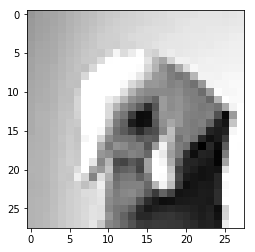

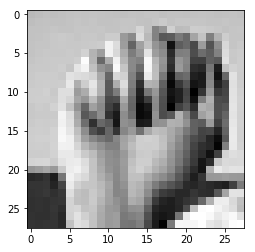

In [52]:
# look at an exmaple images
plt.imshow(training_images[5], cmap = 'gray')
plt.show()

plt.imshow(testing_images[3], cmap = 'gray')
plt.show()

In [53]:
np.expand_dims(training_images, axis = -1).shape

(27455, 28, 28, 1)

In [54]:
np.reshape(training_images, (-1, 28, 28, 1)).shape

(27455, 28, 28, 1)

In [55]:
# In this section you will have to add another dimension to the data
# So, for example, if your array is (10000, 28, 28)
# You will need to make it (10000, 28, 28, 1)
# Hint: np.expand_dims

training_images = np.expand_dims(training_images, axis = -1)
testing_images = np.expand_dims(testing_images, axis = -1)

# alternatively: 
# training_images = np.reshape(training_images, (-1, 28, 28, 1))
# testing_images = np.reshape(testing_images, (-1, 28, 28, 1))

# Create an ImageDataGenerator and do Image Augmentation
train_datagen = ImageDataGenerator(rescale= 1 / 255, 
                                   rotation_range= 40, 
                                   width_shift_range= 0.2,
                                   height_shift_range= 0.2, 
                                   shear_range= 0.2, 
                                   zoom_range= 0.2, 
                                   fill_mode= 'nearest',
                                   horizontal_flip = True)

validation_datagen = ImageDataGenerator(rescale= 1 / 255)
    
# Keep These
print(training_images.shape)
print(testing_images.shape)
    
# Their output should be:
# (27455, 28, 28, 1)
# (7172, 28, 28, 1)

(27455, 28, 28, 1)
(7172, 28, 28, 1)


In [71]:
train_generator = train_datagen.flow(training_images, training_labels, batch_size= 32)
validation_generator = validation_datagen.flow(testing_images, testing_labels, batch_size = 32)

In [85]:
# Define the model
# Use no more than 2 Conv2D and 2 MaxPooling2D
model = tf.keras.models.Sequential([
    layers.Conv2D(filters = 64, kernel_size= (3,3), activation = 'relu', input_shape = (28, 28, 1)),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64, (3,3), activation= 'relu'),
    layers.MaxPool2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation= 'relu'),
    layers.Dense(26, activation= 'softmax')
    ])

# Compile Model. 
model.compile(optimizer = tf.train.AdamOptimizer(), 
              loss = 'sparse_categorical_crossentropy', 
              metrics = ['acc'])

# Train the Model
history = model.fit_generator(generator= train_generator, 
                              epochs = 15, 
                              validation_data = validation_generator)

# this gives bad results, but I'm keeping so I can match the expected output
# need to normalize images!!!
model.evaluate(testing_images, testing_labels)
    
# The output from model.evaluate should be close to:
[6.92426086682151, 0.56609035]


Epoch 1/15
858/858 [==============================] - 24s 28ms/step - loss: 2.8279 - acc: 0.1410 - val_loss: 2.1185 - val_acc: 0.3076
Epoch 2/15
858/858 [==============================] - 22s 26ms/step - loss: 2.1366 - acc: 0.3251 - val_loss: 1.5200 - val_acc: 0.4748
Epoch 3/15
858/858 [==============================] - 22s 26ms/step - loss: 1.7295 - acc: 0.4463 - val_loss: 1.0217 - val_acc: 0.6577
Epoch 4/15
858/858 [==============================] - 23s 26ms/step - loss: 1.4942 - acc: 0.5213 - val_loss: 0.9549 - val_acc: 0.6479
Epoch 5/15
858/858 [==============================] - 22s 26ms/step - loss: 1.3273 - acc: 0.5689 - val_loss: 0.7719 - val_acc: 0.7197
Epoch 6/15
858/858 [==============================] - 23s 27ms/step - loss: 1.2165 - acc: 0.6005 - val_loss: 0.7703 - val_acc: 0.7160
Epoch 7/15
858/858 [==============================] - 22s 26ms/step - loss: 1.1220 - acc: 0.6329 - val_loss: 0.5966 - val_acc: 0.7964
Epoch 8/15
858/858 [==============================] - 22s 26ms

[6.92426086682151, 0.56609035]

In [86]:
# This is a better way to evaluate 
model.evaluate_generator(validation_generator)

[0.31637088554701986, 0.8950083658672616]

In [92]:
history.history.keys()

dict_keys(['val_loss', 'loss', 'val_acc', 'acc'])

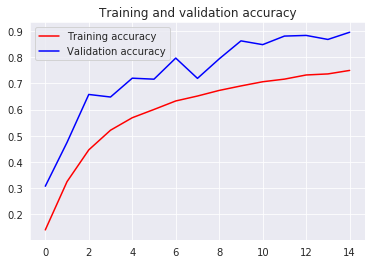

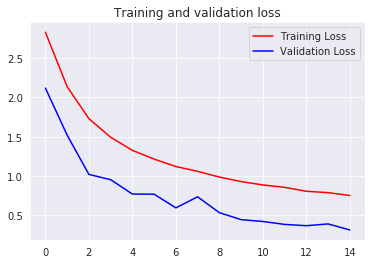

In [96]:
# Plot the chart for accuracy and loss on both training and validation

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')

acc = history.history.get('acc')
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history.get('val_loss')

epochs = range(len(acc))

# plt.figure()
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()


plt.figure()
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()